In [2]:
import sys
import os

# Adjust the path to point to the folder containing 'model_zoo'
project_root = os.path.abspath("..")  # assumes notebook is in 'PROJECT-4/notebooks'
sys.path.append(project_root)


# Imports

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from model_zoo.preprocess import preprocess_data
from model_zoo.optimization import optimize_model
from model_zoo.evaluator import evaluate_model
from model_zoo.models import get_model
from model_zoo.visualizer import plot_metrics

# Load Dataset

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# Preprocess

In [6]:
X_train, X_test, y_train, y_test = preprocess_data(X, y)

# Optimizing and Evaluating Models

In [15]:
model_names = ["logistic_regression", "random_forest", "xgboost", "adaboost", "svm"]

results = []

for model_name in model_names:
    print(f" Optimizing {model_name}...")
    trial = optimize_model(model_name, X_train, X_test, y_train, y_test)

    print(f" Best trial for {model_name}:")
    print(trial)

    # Train with best params
    try:
        model = get_model(model_name)(**trial.params)
    except:
        model = get_model(model_name)()

    model.fit(X_train, y_train)

    # Evaluate
    scores = evaluate_model(model, X_test, y_test)
    scores['model'] = model_name
    results.append(scores)

[I 2025-05-05 18:55:30,384] A new study created in memory with name: no-name-5b42ea11-b2a8-4f74-b7f0-f116140580ad
[I 2025-05-05 18:55:30,403] Trial 0 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,420] Trial 1 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,435] Trial 2 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,450] Trial 3 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,466] Trial 4 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,481] Trial 5 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30

 Optimizing logistic_regression...


[I 2025-05-05 18:55:30,577] Trial 11 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,594] Trial 12 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,611] Trial 13 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,626] Trial 14 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,641] Trial 15 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,657] Trial 16 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:30,672] Trial 17 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.973

 Best trial for logistic_regression:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9736842105263158], datetime_start=datetime.datetime(2025, 5, 5, 18, 55, 30, 385710), datetime_complete=datetime.datetime(2025, 5, 5, 18, 55, 30, 403250), params={}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={}, trial_id=0, value=None)
 Optimizing random_forest...


[I 2025-05-05 18:55:31,298] Trial 0 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 199, 'max_depth': 31}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 18:55:31,662] Trial 1 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 173, 'max_depth': 14}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 18:55:31,782] Trial 2 finished with value: 0.956140350877193 and parameters: {'n_estimators': 56, 'max_depth': 28}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 18:55:31,954] Trial 3 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 82, 'max_depth': 23}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 18:55:32,333] Trial 4 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 183, 'max_depth': 6}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 18:55:32,364] Trial 5 finished with value: 0.956140350877193 and parameters: {'n_estimator

 Best trial for random_forest:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9649122807017544], datetime_start=datetime.datetime(2025, 5, 5, 18, 55, 30, 878172), datetime_complete=datetime.datetime(2025, 5, 5, 18, 55, 31, 297164), params={'n_estimators': 199, 'max_depth': 31}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=10, step=1), 'max_depth': IntDistribution(high=32, log=False, low=2, step=1)}, trial_id=0, value=None)


[I 2025-05-05 18:55:38,776] A new study created in memory with name: no-name-63360dd5-9b5b-425b-b992-e4d1899d876b
[I 2025-05-05 18:55:38,837] Trial 0 finished with value: 0.956140350877193 and parameters: {'eta': 0.07933270962889215}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 18:55:38,883] Trial 1 finished with value: 0.956140350877193 and parameters: {'eta': 0.12008097417139815}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 18:55:38,954] Trial 2 finished with value: 0.956140350877193 and parameters: {'eta': 0.050570459276995786}. Best is trial 0 with value: 0.956140350877193.


 Optimizing xgboost...


[I 2025-05-05 18:55:39,003] Trial 3 finished with value: 0.956140350877193 and parameters: {'eta': 0.15414359274325132}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 18:55:39,050] Trial 4 finished with value: 0.956140350877193 and parameters: {'eta': 0.15096875495117945}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 18:55:39,100] Trial 5 finished with value: 0.956140350877193 and parameters: {'eta': 0.1546044712077944}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 18:55:39,163] Trial 6 finished with value: 0.956140350877193 and parameters: {'eta': 0.07135407060005018}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 18:55:39,210] Trial 7 finished with value: 0.956140350877193 and parameters: {'eta': 0.155537348022658}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 18:55:39,287] Trial 8 finished with value: 0.956140350877193 and parameters: {'eta': 0.018270804755146572}. Best is trial 0 with value: 0.95614035087

 Best trial for xgboost:
FrozenTrial(number=15, state=TrialState.COMPLETE, values=[0.9649122807017544], datetime_start=datetime.datetime(2025, 5, 5, 18, 55, 39, 592229), datetime_complete=datetime.datetime(2025, 5, 5, 18, 55, 39, 674746), params={'eta': 0.01035619888692274}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'eta': FloatDistribution(high=0.3, log=False, low=0.01, step=None)}, trial_id=15, value=None)
 Optimizing adaboost...


[I 2025-05-05 18:55:41,013] Trial 0 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:41,206] Trial 1 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:41,398] Trial 2 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:41,588] Trial 3 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:41,785] Trial 4 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:41,978] Trial 5 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 18:55:42,168] Trial 6 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105

 Best trial for adaboost:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9736842105263158], datetime_start=datetime.datetime(2025, 5, 5, 18, 55, 40, 772322), datetime_complete=datetime.datetime(2025, 5, 5, 18, 55, 41, 13311), params={}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={}, trial_id=0, value=None)
 Optimizing svm...


[I 2025-05-05 18:55:46,777] Trial 0 finished with value: 0.9824561403508771 and parameters: {'C': 1.3018432469414811}. Best is trial 0 with value: 0.9824561403508771.
[I 2025-05-05 18:55:46,782] Trial 1 finished with value: 0.9824561403508771 and parameters: {'C': 1.3560197878793256}. Best is trial 0 with value: 0.9824561403508771.
[I 2025-05-05 18:55:46,788] Trial 2 finished with value: 0.9736842105263158 and parameters: {'C': 7.220842337300668}. Best is trial 0 with value: 0.9824561403508771.
[I 2025-05-05 18:55:46,794] Trial 3 finished with value: 0.9824561403508771 and parameters: {'C': 2.950979873326777}. Best is trial 0 with value: 0.9824561403508771.
[I 2025-05-05 18:55:46,801] Trial 4 finished with value: 0.9824561403508771 and parameters: {'C': 2.7213555583307025}. Best is trial 0 with value: 0.9824561403508771.
[I 2025-05-05 18:55:46,805] Trial 5 finished with value: 0.9824561403508771 and parameters: {'C': 5.387733420344636}. Best is trial 0 with value: 0.9824561403508771.
[

 Best trial for svm:
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9824561403508771], datetime_start=datetime.datetime(2025, 5, 5, 18, 55, 46, 772051), datetime_complete=datetime.datetime(2025, 5, 5, 18, 55, 46, 777427), params={'C': 1.3018432469414811}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=10.0, log=False, low=0.1, step=None)}, trial_id=0, value=None)


## Evaluation Metrics

🔍 Optimizing logistic_regression...


[I 2025-05-05 19:04:42,745] A new study created in memory with name: no-name-3370fccc-9acb-4fc5-bd72-d5a421970241
[I 2025-05-05 19:04:42,804] Trial 0 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:42,822] Trial 1 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:42,841] Trial 2 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:42,860] Trial 3 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:42,878] Trial 4 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:42,897] Trial 5 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:42

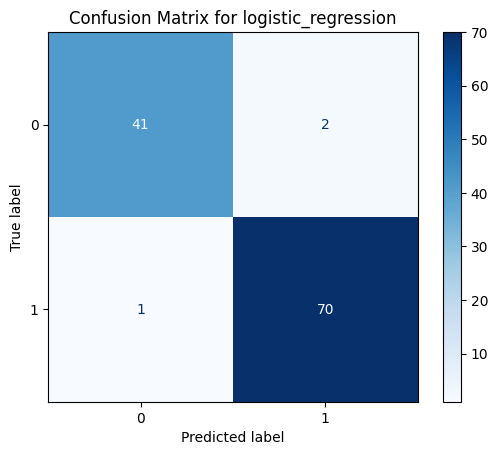

[I 2025-05-05 19:04:43,834] A new study created in memory with name: no-name-1ff04ab0-5be1-4e48-9618-3531460964ca


🔍 Optimizing random_forest...


[I 2025-05-05 19:04:44,109] Trial 0 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 95, 'max_depth': 21}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 19:04:44,466] Trial 1 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 126, 'max_depth': 17}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 19:04:44,668] Trial 2 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 71, 'max_depth': 30}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 19:04:45,038] Trial 3 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 131, 'max_depth': 31}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 19:04:45,245] Trial 4 finished with value: 0.9649122807017544 and parameters: {'n_estimators': 72, 'max_depth': 17}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-05-05 19:04:45,309] Trial 5 finished with value: 0.9649122807017544 and parameters: {'n_estimat

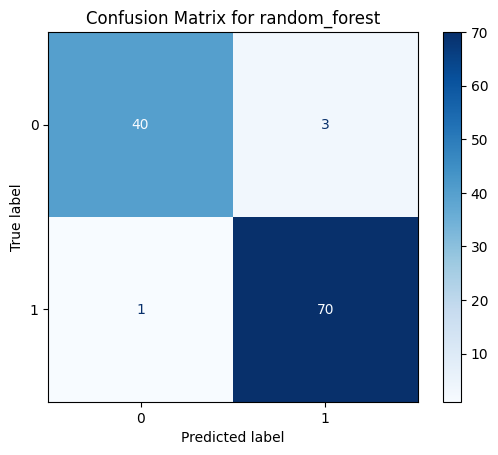

[I 2025-05-05 19:04:54,501] A new study created in memory with name: no-name-c069cda8-a302-4e18-8ba1-569c593d50e9
[I 2025-05-05 19:04:54,572] Trial 0 finished with value: 0.956140350877193 and parameters: {'eta': 0.24921058410759145}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 19:04:54,633] Trial 1 finished with value: 0.956140350877193 and parameters: {'eta': 0.09731272440024191}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 19:04:54,683] Trial 2 finished with value: 0.956140350877193 and parameters: {'eta': 0.2942862655948314}. Best is trial 0 with value: 0.956140350877193.


🔍 Optimizing xgboost...


[I 2025-05-05 19:04:54,736] Trial 3 finished with value: 0.956140350877193 and parameters: {'eta': 0.19640016247645936}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 19:04:54,798] Trial 4 finished with value: 0.956140350877193 and parameters: {'eta': 0.12530475375554062}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 19:04:54,861] Trial 5 finished with value: 0.956140350877193 and parameters: {'eta': 0.09639943023556105}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 19:04:54,927] Trial 6 finished with value: 0.956140350877193 and parameters: {'eta': 0.08290715687495753}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 19:04:54,979] Trial 7 finished with value: 0.956140350877193 and parameters: {'eta': 0.18745629880302203}. Best is trial 0 with value: 0.956140350877193.
[I 2025-05-05 19:04:55,056] Trial 8 finished with value: 0.956140350877193 and parameters: {'eta': 0.056452675960919865}. Best is trial 0 with value: 0.95614035

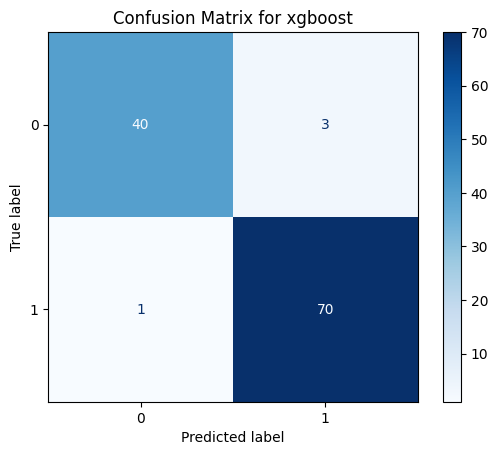

[I 2025-05-05 19:04:57,617] A new study created in memory with name: no-name-6bd06a4d-3c40-41bf-8cf5-baed03f5986e


🔍 Optimizing adaboost...


[I 2025-05-05 19:04:57,875] Trial 0 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:58,120] Trial 1 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:58,362] Trial 2 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:58,612] Trial 3 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:58,855] Trial 4 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:59,101] Trial 5 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:04:59,345] Trial 6 finished with value: 0.9736842105263158 and parameters: {}. Best is trial 0 with value: 0.9736842105

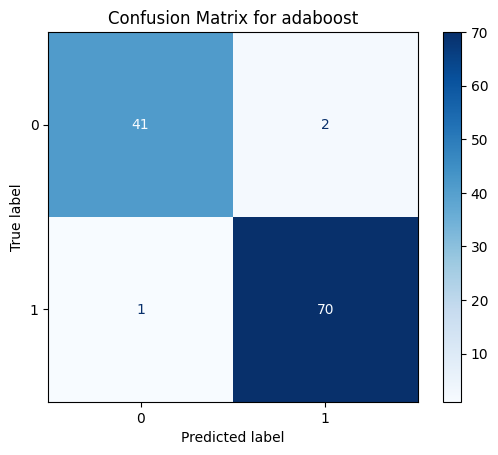

[I 2025-05-05 19:05:06,654] A new study created in memory with name: no-name-205328f4-8011-42af-b17e-7a3479809900
[I 2025-05-05 19:05:06,662] Trial 0 finished with value: 0.9736842105263158 and parameters: {'C': 6.825573372516166}. Best is trial 0 with value: 0.9736842105263158.
[I 2025-05-05 19:05:06,667] Trial 1 finished with value: 0.9824561403508771 and parameters: {'C': 4.023890659401435}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,674] Trial 2 finished with value: 0.9824561403508771 and parameters: {'C': 4.45723838732784}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,681] Trial 3 finished with value: 0.9824561403508771 and parameters: {'C': 4.630522894854167}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,687] Trial 4 finished with value: 0.9736842105263158 and parameters: {'C': 8.034613155692297}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,694] Trial 5 finished with value: 

🔍 Optimizing svm...


[I 2025-05-05 19:05:06,853] Trial 19 finished with value: 0.9736842105263158 and parameters: {'C': 9.928403763711446}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,865] Trial 20 finished with value: 0.9736842105263158 and parameters: {'C': 7.380962764042414}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,879] Trial 21 finished with value: 0.9824561403508771 and parameters: {'C': 4.5707588152792145}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,892] Trial 22 finished with value: 0.9824561403508771 and parameters: {'C': 4.346075757016844}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,905] Trial 23 finished with value: 0.9824561403508771 and parameters: {'C': 3.0280692762286026}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-05-05 19:05:06,917] Trial 24 finished with value: 0.9824561403508771 and parameters: {'C': 5.277168536084087}. Best is trial 1 with value: 0.98245614035087

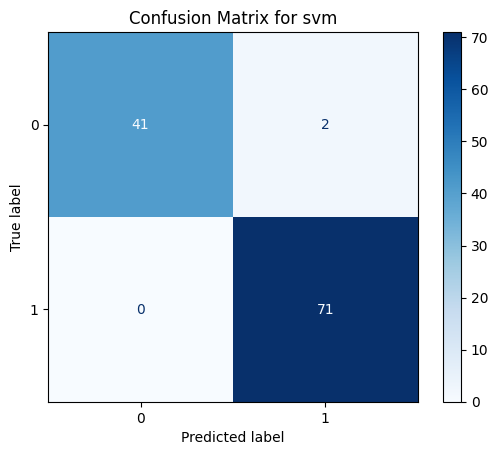

                 model  accuracy  precision    recall  f1_score   cv_mean  \
0  logistic_regression  0.973684   0.972222  0.985915  0.979021  0.943782   
1        random_forest  0.964912   0.958904  0.985915  0.972222  0.956094   
2              xgboost  0.964912   0.958904  0.985915  0.972222  0.961388   
3             adaboost  0.973684   0.972222  0.985915  0.979021  0.971868   
4                  svm  0.982456   0.972603  1.000000  0.986111  0.933271   

     cv_std  
0  0.010437  
1  0.024778  
2  0.023255  
3  0.019559  
4  0.026300  


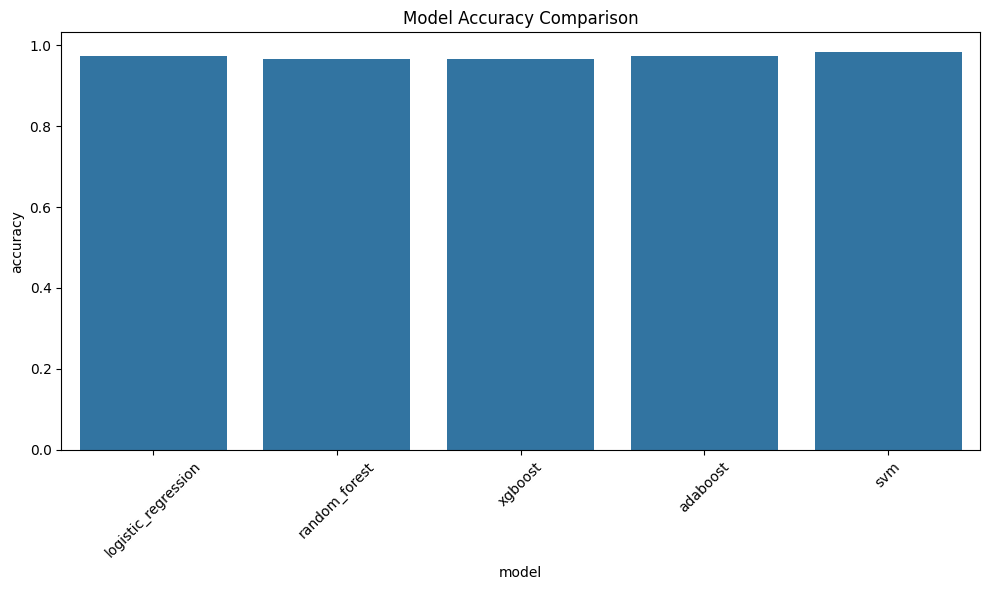

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Function to calculate Precision, Recall, and F1-score
def calculate_additional_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Function to perform cross-validation
def cross_validate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    return cv_scores.mean(), cv_scores.std()  # Mean and std deviation of accuracy

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Loop through models and evaluate
results = []
for model_name in model_names:
    print(f"🔍 Optimizing {model_name}...")
    trial = optimize_model(model_name, X_train, X_test, y_train, y_test)
    
    model = get_model(model_name)(**trial.params) if trial else get_model(model_name)()
    model.fit(X_train, y_train)
    
    # Standard Evaluation
    accuracy = model.score(X_test, y_test)
    
    # Additional Metrics
    precision, recall, f1 = calculate_additional_metrics(model, X_test, y_test)
    
    # Cross-Validation
    mean_cv, std_cv = cross_validate_model(model, X, y)
    
    # Store results
    results.append({
        "model": model_name, 
        "accuracy": accuracy, 
        "precision": precision, 
        "recall": recall, 
        "f1_score": f1, 
        "cv_mean": mean_cv, 
        "cv_std": std_cv
    })
    
    # Plot Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test, model_name)

# Display Results
df = pd.DataFrame(results)
print(df)
plot_metrics(df)


# Displaying the results in the notebook

In [ ]:
# After running models, and collecting results:
df = pd.DataFrame(results)

df


,accuracy,f1_score,roc_auc,model
0,0.973684,0.973621,0.997380,logistic_regression
1,0.947368,0.947368,0.994759,random_forest
2,0.964912,0.964738,0.994104,xgboost
3,0.973684,0.973621,0.997052,adaboost
4,0.982456,0.982369,NaN,svm


#  Visualizing Results

   accuracy  f1_score   roc_auc                model
0  0.973684  0.973621  0.997380  logistic_regression
1  0.947368  0.947368  0.994759        random_forest
2  0.964912  0.964738  0.994104              xgboost
3  0.973684  0.973621  0.997052             adaboost
4  0.982456  0.982369       NaN                  svm


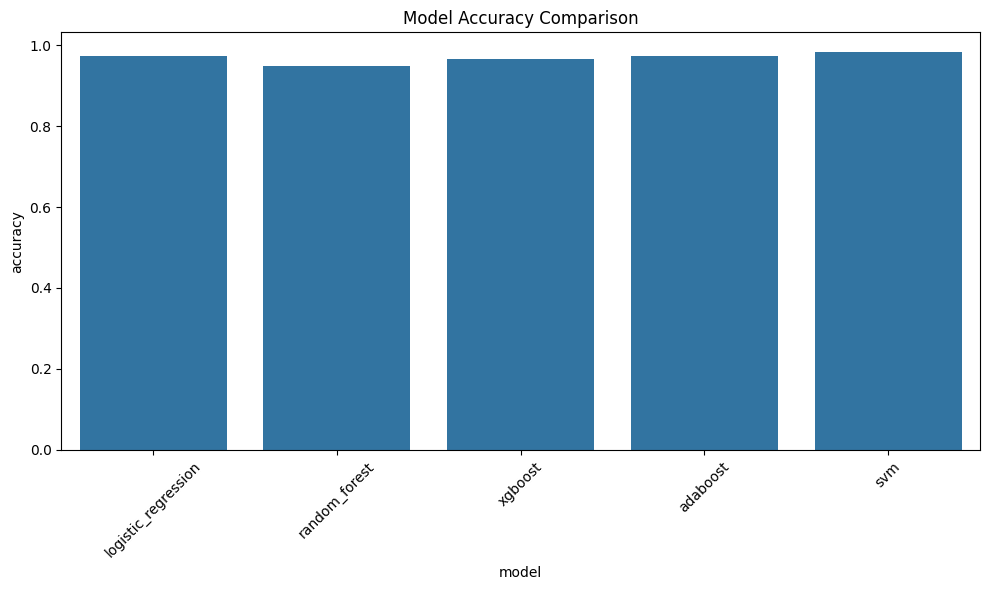

In [13]:
df = pd.DataFrame(results)
print(df)
plot_metrics(df)

AttributeError: module 'matplotlib' has no attribute 'show'

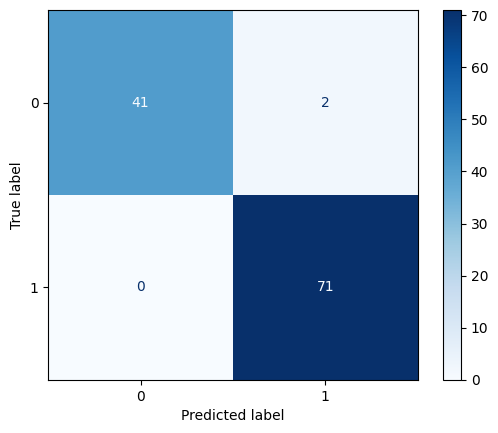

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()
